In [1]:
import pandas as pd 
import os
os.chdir('/home/spankaew/Git/astrologics')
import astrologics as le
import seaborn as sns
import matplotlib.pyplot as plt

# Load model path into logic_ensemble object

In [2]:
model_path = '/home/spankaew/Git/astrologics/inferred_model/synthetic_random_diff/'
model = le.LogicEnsemble(model_path, project_name = 'synthetic_random_diff')
model.create_simulation()

Simulation object created


# Create simulation trajectory from the simulation
When we perform the simulation, the result of the timestep node activity can be visualized using dimension reduction method such as `pca`.

In [3]:
test = pd.read_csv(model_path + 'bn_0.bnet', sep = ',', header = None)
test[1] = 0.5
test_dict = dict(zip(test[0], test[1]))
test_dict

{'x0': 0.5,
 'x1': 0.5,
 'x10': 0.5,
 'x11': 0.5,
 'x12': 0.5,
 'x13': 0.5,
 'x14': 0.5,
 'x15': 0.5,
 'x17': 0.5,
 'x2': 0.5,
 'x20': 0.5,
 'x21': 0.5,
 'x23': 0.5,
 'x24': 0.5,
 'x26': 0.5,
 'x3': 0.5,
 'x4': 0.5,
 'x6': 0.5,
 'x8': 0.5,
 'x9': 0.5}

In [17]:
model.simulation.update_parameters(max_time = 10, sample_count = 2000)
model.simulation.run_simulation(initial_state=test_dict)

Start simulation


 42%|████▏     | 415/1000 [02:34<03:37,  2.69it/s]


KeyboardInterrupt: 

In [6]:
save_path = 'data/simulation_files/synthetic_random_diff_simulation.csv'
model.simulation.simulation_df = pd.read_csv(save_path, index_col = 0)

Trajectory object created


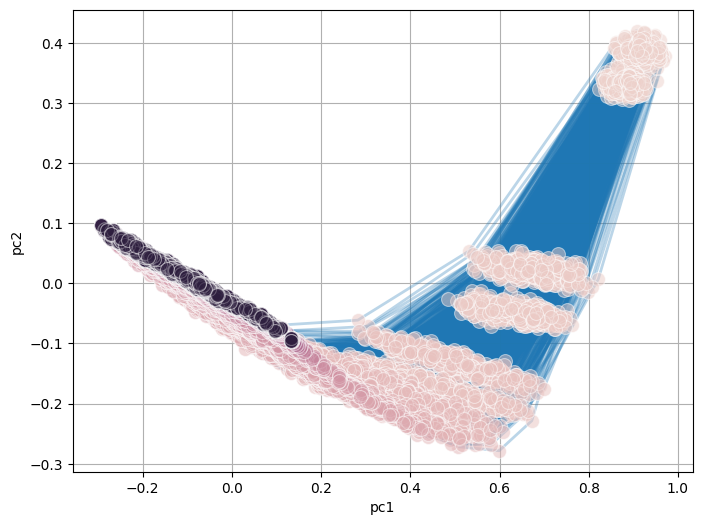

In [8]:
model.create_trajectory()
model.trajectory.pca_trajectory()
model.trajectory.plot_pca_trajectory(color = 'timepoint')

In [9]:
model.trajectory.calculate_distancematrix(mode = 'trajectory')

Calculating distance matrix for whole trajectory...


100%|██████████| 1000/1000 [01:04<00:00, 15.60it/s]

Distance matrix calculated successfully.


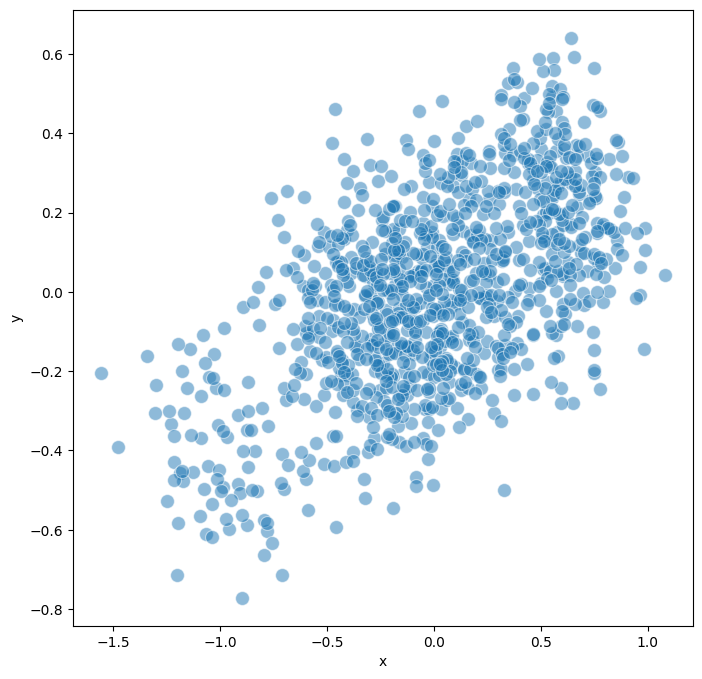

In [10]:
model.trajectory.calculate_MDS()
model.trajectory.plot_MDS(s = 100, fig_size = (8,8))

In [11]:
model.trajectory.calculate_kmean_cluster(n_cluster = 2,
                              random_state = 0)

Calculated k-means clustering with 2 clusters.


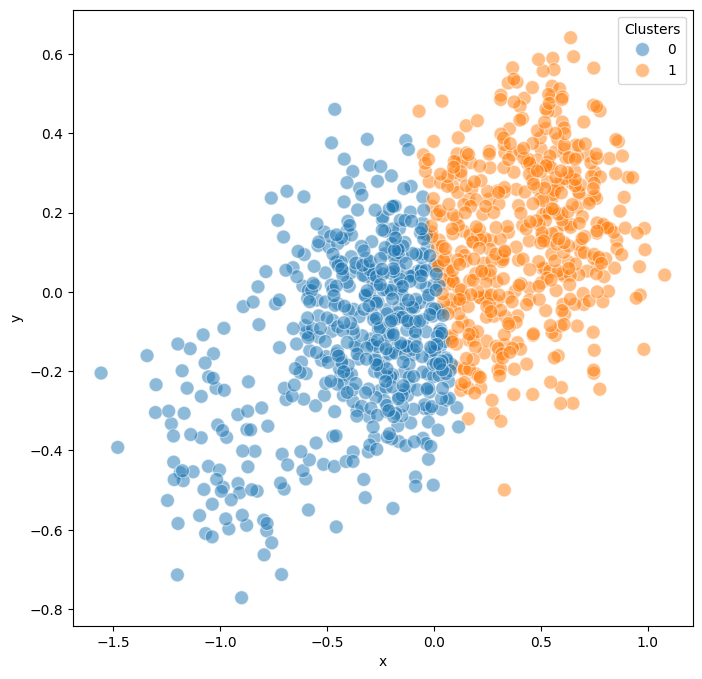

In [12]:
model.trajectory.plot_MDS(s = 100, fig_size = (8,8),plot_cluster = True)

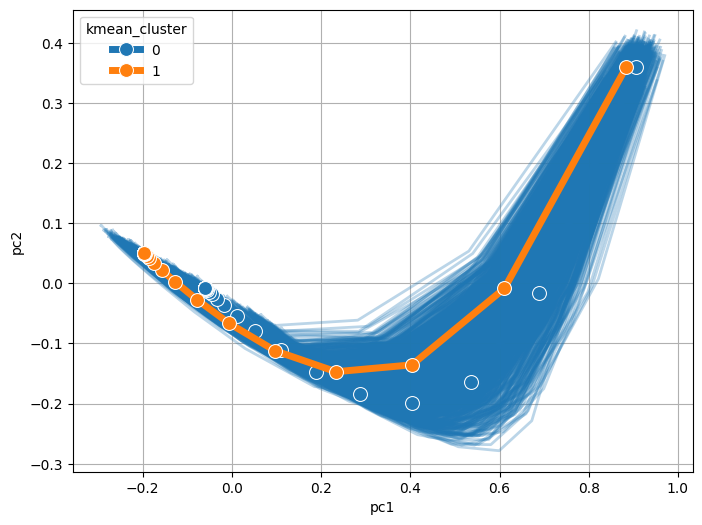

In [13]:
model.trajectory.plot_pca_trajectory(plot_cluster=True)

In [14]:
model.create_logic()
model.logic.model_logic
model.logic.create_flattend_logic_clause()

Loading models logics


100%|██████████| 1000/1000 [00:01<00:00, 783.71it/s]


Concatenate results into matrix


100%|██████████| 1000/1000 [00:01<00:00, 992.29it/s]

Logic object created
Flatten models logic clauses



100%|██████████| 1000/1000 [00:00<00:00, 2991657.63it/s]


Concatenate results into matrix


100%|██████████| 1000/1000 [00:00<00:00, 1541.37it/s]

Flattend logic clause created


In [15]:
# Remove any key named 'herault_hematopoiesis' from the cluster_dict if it exists
cluster_dict = model.trajectory.cluster_dict.copy()
cluster_dict.pop('herault_hematopoiesis', None)
cluster_dict

{'bn_411': np.int32(0),
 'bn_361': np.int32(0),
 'bn_60': np.int32(0),
 'bn_109': np.int32(1),
 'bn_975': np.int32(0),
 'bn_265': np.int32(1),
 'bn_784': np.int32(0),
 'bn_595': np.int32(0),
 'bn_34': np.int32(1),
 'bn_624': np.int32(1),
 'bn_520': np.int32(0),
 'bn_980': np.int32(0),
 'bn_529': np.int32(0),
 'bn_461': np.int32(1),
 'bn_300': np.int32(0),
 'bn_985': np.int32(0),
 'bn_818': np.int32(0),
 'bn_707': np.int32(0),
 'bn_421': np.int32(0),
 'bn_631': np.int32(1),
 'bn_399': np.int32(1),
 'bn_152': np.int32(1),
 'bn_708': np.int32(1),
 'bn_380': np.int32(1),
 'bn_108': np.int32(1),
 'bn_393': np.int32(0),
 'bn_129': np.int32(0),
 'bn_314': np.int32(0),
 'bn_918': np.int32(0),
 'bn_54': np.int32(1),
 'bn_179': np.int32(0),
 'bn_722': np.int32(1),
 'bn_554': np.int32(0),
 'bn_213': np.int32(1),
 'bn_192': np.int32(1),
 'bn_958': np.int32(0),
 'bn_676': np.int32(1),
 'bn_503': np.int32(0),
 'bn_119': np.int32(1),
 'bn_521': np.int32(0),
 'bn_460': np.int32(1),
 'bn_117': np.int32

Model clusters mapped to logic clauses


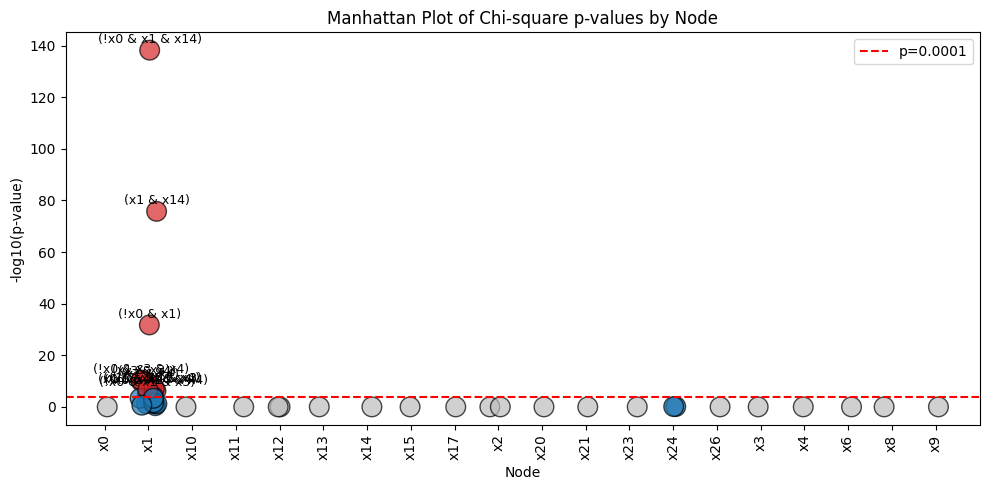

In [16]:
model.logic.map_model_clusters(cluster_dict)
model.logic.calculate_logic_statistic(pval_threshold = 0.0001)
model.logic.plot_manhattan()

/home/spankaew/Git/astrologics/astrologics/logical_rules_processing.py:412: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/home/spankaew/Git/astrologics/astrologics/logical_rules_processing.py:412: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.barplot(


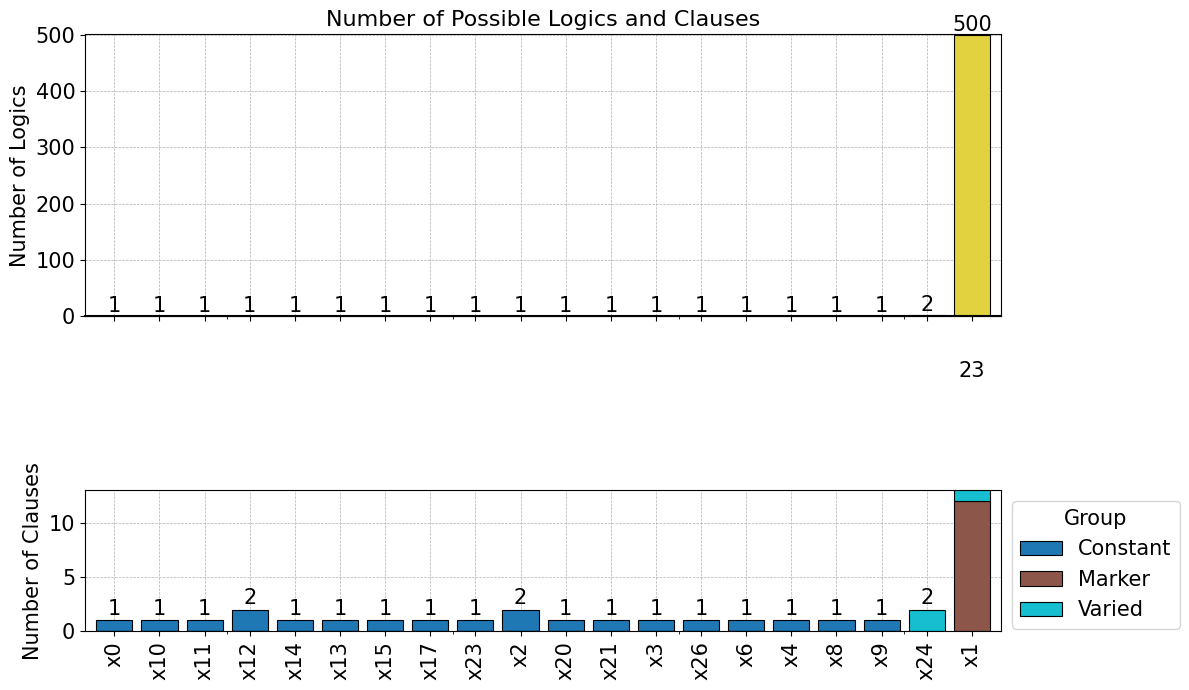

In [17]:
model.logic.plot_logicstat_summary()

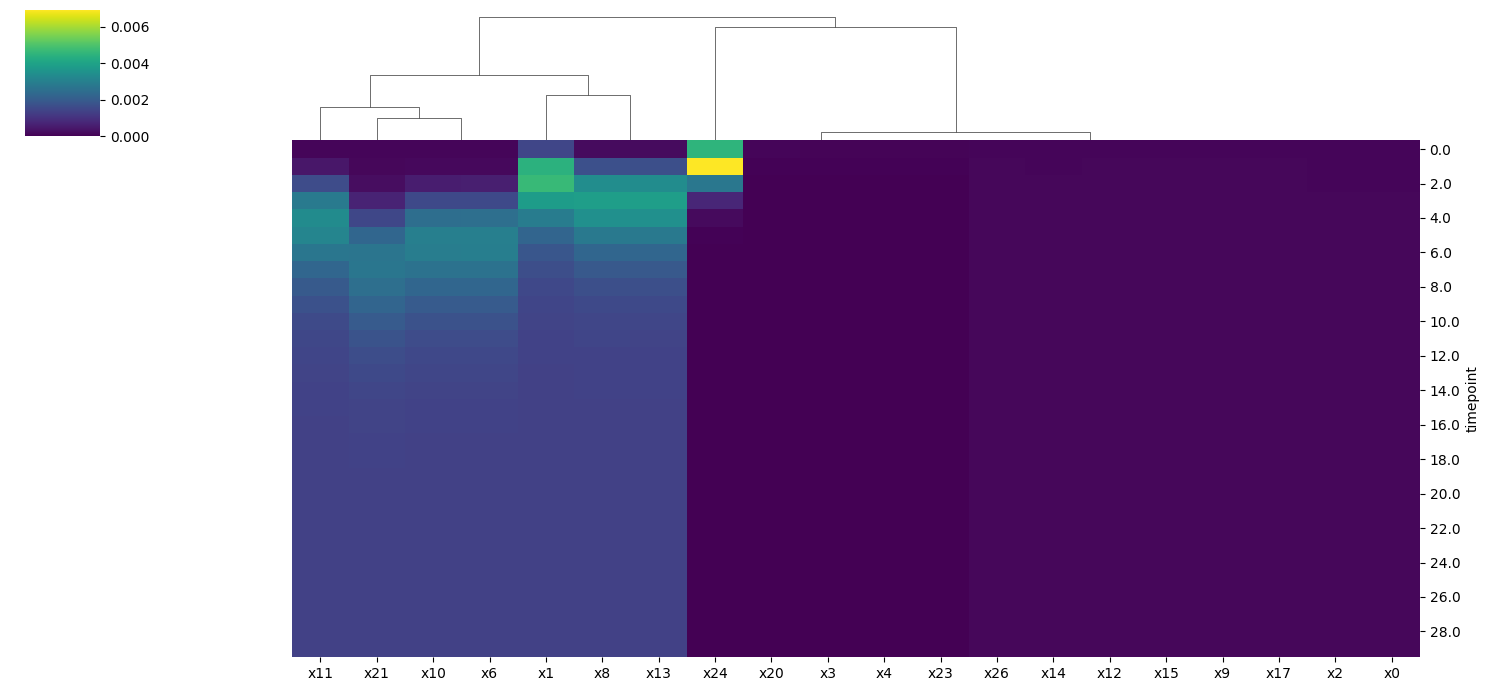

In [18]:
model.trajectory.plot_trajectory_variance()

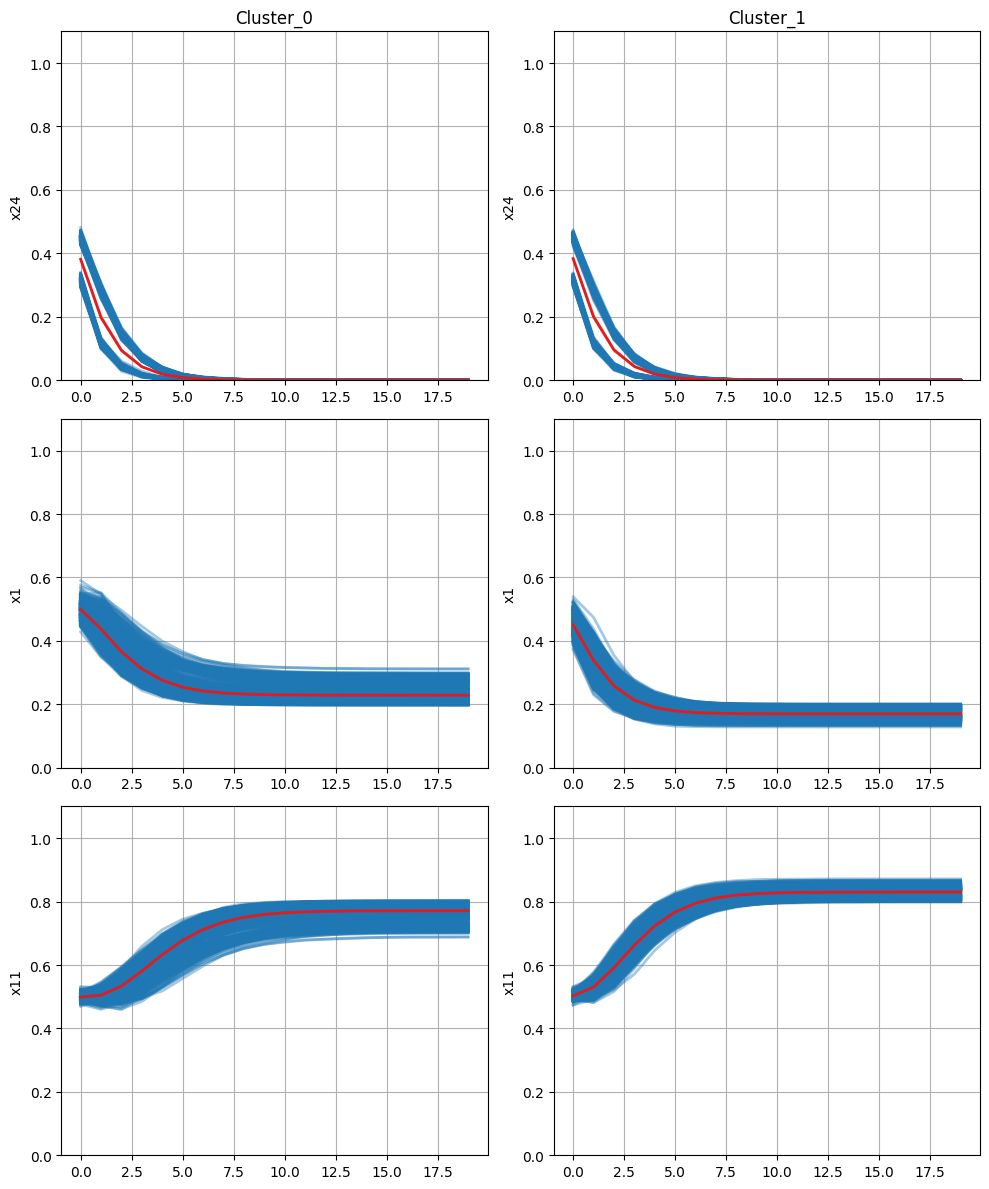

In [20]:
model.trajectory.plot_node_trajectory(node = ['x24', 'x1','x11'],
                                      fig_size = (8, 8))